In [43]:
import requests

REST_API_KEY = '2fa4da0b370eee3234c565b78ecff325'
# url 의 ? 뒤쪽은 쿼리 파라미터
# keyword의 주변 반경 1km 내의 맛집 찾기
KEYWORD_LOCAL_URL = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}&radius=1000'

keywords=['서울역', '홍대입구역']

In [38]:
# header 에 인증 정보 추가 (안하면 401 error)
headers = {
    'Authorization' : f'KakaoAK {REST_API_KEY}'
}
response = requests.get(KEYWORD_LOCAL_URL.format(keywords[0] + '맛집'), headers=headers)
response

<Response [200]>

In [39]:
# 카카오에서 JSON으로 데이터를 준다는 것을 알고 있음
# content 말고 json()으로 바로 뽑아올 수 있다

data = response.json()['documents'] # 장소 정보를 가져옴
data

[{'address_name': '서울 중구 만리동1가 53-8',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 일식 > 일본식라면',
  'distance': '',
  'id': '469577034',
  'phone': '070-4177-0365',
  'place_name': '유즈라멘 만리동점',
  'place_url': 'http://place.map.kakao.com/469577034',
  'road_address_name': '서울 중구 만리재로 217',
  'x': '126.96823844833658',
  'y': '37.556815391728634'},
 {'address_name': '서울 중구 만리동1가 62-16',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페',
  'distance': '',
  'id': '1769574951',
  'phone': '02-365-1932',
  'place_name': '더하우스1932',
  'place_url': 'http://place.map.kakao.com/1769574951',
  'road_address_name': '서울 중구 만리재로35길 7',
  'x': '126.967378869803',
  'y': '37.5555429489062'},
 {'address_name': '서울 중구 만리동1가 62-11',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 양식',
  'distance': '',
  'id': '1646052453',
  'phone': '02-393-1824',
  'place_name': '만리재비스트로',
 

In [29]:
from bs4 import BeautifulSoup

BeautifulSoup(requests.get("https://place.map.kakao.com/m/469577034#comment").content, 'html.parser')


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<title>유즈라멘 만리동점 | 카카오맵</title>
<meta content="유즈라멘 만리동점" property="og:title"/>
<meta content="카카오맵" property="og:site_name"/>
<meta content="서울 중구 만리재로 217 경김회관 1층 (만리동1가 53-8)" property="og:description"/>
<meta content="website" property="og:type"/>
<meta content="http://map3.daum.net/staticmap/og?type=place&amp;srs=wcongnamul&amp;size=400x200&amp;m=492984%2C1127026&amp;service=placeweb" property="og:image"/>
<meta content="https://place.map.kakao.com/m/469577034" property="og:url"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="유즈라멘 만리동점" name="twitter:title"/>
<meta content="서울 중구 만리재로 217 경김회관 1층 (만리동1가 53-8)" name="twitter:description"/>
<meta content="http://map3.daum.net/staticmap/og?type=place&amp;srs=wcongnamul&amp;size=400x200&amp;m=492984%2C1127026&amp;service=placeweb" name="twitter:image"/>
<meta content="user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, w

## comment 수집하기

In [ ]:
COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/469577034/0?order=USEFUL&onlyPhotoComment=false"

comment_datas = requests.get(COMMENT_URL).json()
comment_datas

In [10]:
# 각 가게에 부여된 id와 마지막 comment id 를 넣을 수 있게 format 삽입
COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/{}/{}?order=USEFUL&onlyPhotoComment=false"

In [31]:
# 가게 id 추출
ids = [d['id'] for d in data]
ids

['469577034',
 '1769574951',
 '1646052453',
 '221927024',
 '27276847',
 '1541595421',
 '26939037',
 '27270808',
 '8079539',
 '1981716686',
 '15620998',
 '13499824',
 '11486129',
 '8264239',
 '412548224']

In [51]:
import pandas as pd

comment_df = pd.DataFrame(all_comments)
comment_df_filtered = comment_df[['contents', 'point']]
comment_df_filtered

,contents,point
0,개맛있다\n문제 : 면이 빨리 불어요 어차피 빨리 나오니까 추가할 거면 이따 시키세요,5
1,정말 맛있어요. \n일본에서 먹던 맛을 살리면서도 한국인 입맛도 만족시켜주는 곳입니...,5
2,"국물의 깊이, 얇은 면, 향이 진한 차슈, 그외의 토핑들 그리고 무한리필. 저는 이...",5
3,맛있더라ㅋㅋ 근데 조금 비싸더랑,5
4,너무 웨이팅이 길어요..노답..,3
...,...,...
1431,NaN,4
1432,NaN,5
1433,깔끔한 국물의 도동탕면\n파맛이 느껴지지 않을 정도로 진한 불고기 맛의 불고기파전,4
1434,깔끔한 맛 도동탕면.\n비면도 감칠맛 나고 술도 한 잔 해야겠다.,4


<Axes: xlabel='point'>

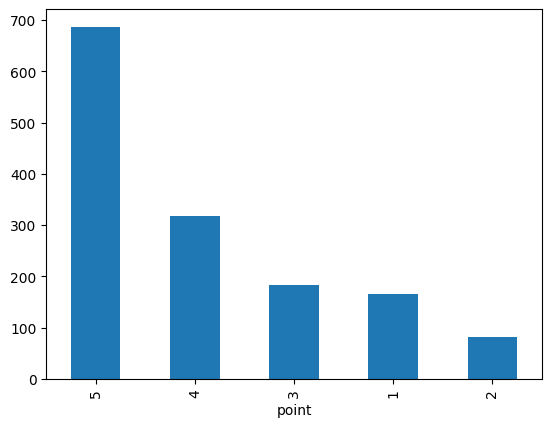

In [52]:
comment_df_filtered['point'].value_counts().plot(kind='bar')

In [57]:
comment_df_filtered.to_csv('comments.csv', encoding='utf-8', index=False)

In [60]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------------------------------------- 250.9/250.9 kB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
comment_df_filtered.to_excel('comments.xlsx', index=False)

In [69]:
seoul = pd.read_csv('data/comments.csv')
seoul_df = pd.DataFrame(seoul)
seoul_df.shape

(1436, 2)

In [70]:
hongdae = pd.read_excel('data/hongdae_comments.xlsx')
hongdae_df = pd.DataFrame(hongdae)
hongdae_df.shape

(3567, 2)

In [71]:
all_comments = pd.concat([seoul_df, hongdae_df], ignore_index=True)
all_comments.shape

(5003, 2)

In [72]:
all_comments.to_excel('all_comments.xlsx')

<Axes: xlabel='point'>

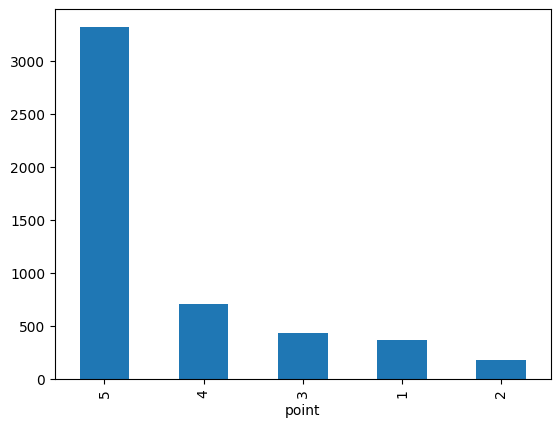

In [73]:
all_comments['point'].value_counts().plot(kind='bar')

In [74]:
all_comments.head()

,contents,point
0,개맛있다\n문제 : 면이 빨리 불어요 어차피 빨리 나오니까 추가할 거면 이따 시키세요,5
1,정말 맛있어요. \n일본에서 먹던 맛을 살리면서도 한국인 입맛도 만족시켜주는 곳입니...,5
2,"국물의 깊이, 얇은 면, 향이 진한 차슈, 그외의 토핑들 그리고 무한리필. 저는 이...",5
3,맛있더라ㅋㅋ 근데 조금 비싸더랑,5
4,너무 웨이팅이 길어요..노답..,3
